In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

# Age + Date_of_birth
Date_of_birth obsahuje formáty:<br>
YYYY-MM-DD 00 00 00<br>
DD-MM-YYYY  0:00:00<br>
DD-MM-YYYY (Obsahuje chyby - dôkazom toho je hneď prvý záznam s 02-10-2029, dalo by sa to opraviť na 1929 a tak by to korešpondovalo s rokmi, no pandas nevie prečítať posledné 2 čísla YY)<br>
Z nasledujúceho výstupu je možné odhadnúť treshold na základe ktorého by sa dalo nájsť storočie pre každý rok (ak ich všetky majú na rovnako). Snahou bolo to transformovať do presných rokov, no po dlhom trápení sa to radšej zjednodušilo do tvaru DD-MM-YY.

Age obsahuje jeden záznam s rokmi 455, aj keď korešponduje s dátumom narodenia, zahodíme ho lebo aj tak ním nestratíme veľa info pri klasifikácii.

In [3]:
train['date_of_birth'] = train['date_of_birth'].str.extract('(\d*-\d\d-\d\d)', expand=True)
train.drop(train[train['age'] > 120].index, inplace=True)
train['date_of_birth'] = pd.to_datetime(train['date_of_birth'])
train['date_of_birth'] = train['date_of_birth'].dt.strftime('%d-%m-%y')
train[(train['age'] < 20)][112:116][['age', 'date_of_birth']]

age date_of_birth
2421  18.0      18-12-99
2444  18.0      02-06-00
2445  18.0      14-09-99
2504  19.0      13-03-99

In [4]:
train['sex'].value_counts()

F    1829
M     860
?     110
Name: sex, dtype: int64

In [5]:
train['personal_info'].head()

0    White|United-States\nSome-college -- Never-mar...
1    White|United-States\nHS-grad -- Never-married|...
2    White|United-States\nBachelors -- Divorced|Not...
3    White|United-States\nBachelors -- Never-marrie...
4    White|United-States\nHS-grad -- Never-married|...
Name: personal_info, dtype: object

# There are important and related information to almost all of the colums in personal- info Column



We can devide personal_info atribute into 5 individual atributes


In [6]:
pom = None
pom = train['personal_info'].str.split('[|]', 1, expand=True) 
              # rename(columns={0:'class', 1:'class number'})
#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['personal_info'], inplace=True)
train['race'] = pom[0]
train['personal_info'] = pom[1]
train['personal_info'] = train['personal_info'].astype(str) 

pom1 = test['personal_info'].str.split('[|]', 1, expand=True)  
test.drop(columns=['personal_info'], inplace=True) 
test['race'] = pom1[0]
test['personal_info'] = pom1[1]
test['personal_info'] = test['personal_info'].astype(str)

In [7]:
train['personal_info'].head()

0    United-States\nSome-college -- Never-married|O...
1    United-States\nHS-grad -- Never-married|Own-child
2    United-States\nBachelors -- Divorced|Not-in-fa...
3    United-States\nBachelors -- Never-married|Own-...
4    United-States\nHS-grad -- Never-married|Not-in...
Name: personal_info, dtype: object

In [8]:
pom = train['personal_info'].str.split('\n', 1, expand=True)   # rename(columns={0:'class', 1:'class number'})

#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['personal_info'], inplace=True)
train['Country'] = pom[0]
train['personal_info2'] = pom[1]     
train['personal_info2'] = train['personal_info2'].astype(str) 

pom1 = test['personal_info'].str.split('\n', 1, expand=True)
test.drop(columns=['personal_info'], inplace=True)
test['Country'] = pom1[0]
test['personal_info2'] = pom1[1]
test['personal_info2'] = test['personal_info2'].astype(str) 

In [9]:
train['personal_info2'].head()

0    Some-college -- Never-married|Own-child
1         HS-grad -- Never-married|Own-child
2        Bachelors -- Divorced|Not-in-family
3       Bachelors -- Never-married|Own-child
4     HS-grad -- Never-married|Not-in-family
Name: personal_info2, dtype: object

In [10]:
pom = train['personal_info2'].str.split('--', 1, expand=True)   # rename(columns={0:'class', 1:'class number'})

#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['personal_info2'], inplace=True)
train['education-status'] = pom[0]
train['personal_info3'] = pom[1]
train['personal_info3'] = train['personal_info3'].astype(str) 



pom1 = test['personal_info2'].str.split('--', 1, expand=True)

test.drop(columns=['personal_info2'], inplace=True)
test['education-status'] = pom1[0]
test['personal_info3'] = pom1[1]
test['personal_info3'] = test['personal_info3'].astype(str) 

In [11]:
train['personal_info3'].head()

0         Never-married|Own-child
1         Never-married|Own-child
2          Divorced|Not-in-family
3         Never-married|Own-child
4     Never-married|Not-in-family
Name: personal_info3, dtype: object

In [12]:
pom = train['personal_info3'].str.split('[|]', 1, expand=True)   # rename(columns={0:'class', 1:'class number'})

#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['personal_info3'], inplace=True)

train['marital-status'] = pom[0]
train['personal_info'] = pom[1]
train['personal_info'] = train['personal_info'].astype(str) 



pom1 = test['personal_info3'].str.split('[|]', 1, expand=True) 
test.drop(columns=['personal_info3'], inplace=True)
test['marital-status'] = pom1[0]
test['personal_info'] = pom1[1]
test['personal_info'] = test['personal_info'].astype(str) 

In [13]:
train['personal_info'].head()

0        Own-child
1        Own-child
2    Not-in-family
3        Own-child
4    Not-in-family
Name: personal_info, dtype: object

In [14]:
train['class'].head()

0    negative.|3734
1    negative.|3516
2    negative.|2331
3    negative._2960
4    negative._3424
Name: class, dtype: object

# class + class number
rozdelenie atribútu class na 2

In [15]:
pom = train['class'].str.split('.[|_]', 1, expand=True)   # rename(columns={0:'class', 1:'class number'})
#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['class'], inplace=True)
train['class'] = pom[0]
train['class number'] = pom[1]
train['class number'] = train['class number'].astype(int) 
train['class number'].describe()

count    2799.000000
mean     1895.972847
std      1091.149836
min         1.000000
25%       957.000000
50%      1914.000000
75%      2838.000000
max      3772.000000
Name: class number, dtype: float64

In [16]:
#train.to_csv('repaired.csv')

Now we have devided the personal_info atribute into 5 atributes and class in to class and class number so that we can use furhter for preprocessing and cleaning data


In [17]:
class Abc(TransformerMixin):
    def __init__(self, column, source, target):
        self.column = column
        self.source = source
        self.target = target
        
    def fit(self, df, y=None, **fit_params):
        return self
    
    def transform(self, df, **transform_params):
        sample = df[self.column] == self.source
        df.loc[sample, self.column] = self.target
        return df

# On thyroxin

In [18]:
train['on thyroxine'].value_counts()

f        2216
t         303
F         131
FALSE     122
TRUE       16
T          11
Name: on thyroxine, dtype: int64

In [19]:
ppl = Pipeline([
               ('a', Abc('on thyroxine', 'TRUE', 't')),
                    ('ab', Abc('on thyroxine', 'FALSE', 'f')),
                    ('abc', Abc('on thyroxine', 'T', 't')),
                    ('abcd', Abc('on thyroxine', 'F', 'f'))
                
               ])

model = ppl.fit(train)
train_t = model.transform(train)
test_t = model.transform(test)

In [20]:
train['sex'].value_counts()

F    1829
M     860
?     110
Name: sex, dtype: int64

In [21]:
train.loc[(train['sex']=='?' )  & (train['pregnant']== 't'  ), 'sex'] = 'F'
test.loc[(test['sex']=='?' )  & (test['pregnant']== 't'  ), 'sex'] = 'F'

In [22]:
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Unmarried'  ), 'sex'] = 'F'
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Not-in-family'  ), 'sex'] = 'F'
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Husband'  ), 'sex'] = 'M'
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Wife'  ), 'sex'] = 'F'
train.loc[(train['sex']=='F' )  & (train['personal_info']== 'Husband'  ), 'sex'] = 'M'
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Own-child'  ), 'sex'] = 'M'


test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Unmarried'  ), 'sex'] = 'F'
test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Not-in-family'  ), 'sex'] = 'F'
test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Husband'  ), 'sex'] = 'M'
test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Wife'  ), 'sex'] = 'F'
test.loc[(test['sex']=='F' )  & (test['personal_info']== 'Husband'  ), 'sex'] = 'M'
test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Own-child'  ), 'sex'] = 'M'

there is a relation between sex and occupation

In [23]:
train.loc[(train['sex']=='?' )  & (train['occupation']== ' Craft-repair'  ), 'sex'] = 'M'

test.loc[(train['sex']=='?' )  & (test['occupation']== ' Craft-repair'  ), 'sex'] = 'M'

In [24]:
train.sex.value_counts()

F    1871
M     928
Name: sex, dtype: int64

In [25]:
train.to_csv('repaired.csv')

# referral source


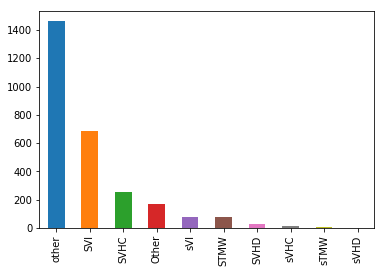

In [26]:
train['referral source'].value_counts().plot.bar();

In [27]:
train['referral source'].value_counts()

other    1463
SVI       689
SVHC      257
Other     169
sVI        81
STMW       81
SVHD       29
sVHC       18
sTMW       10
sVHD        2
Name: referral source, dtype: int64

The Data in this atribute is dis-organised so we can simply organise by combining like data to avoid case sensitivity

In [28]:
train.loc[(train['referral source']=='sVHC'), 'referral source'] = 'SVHC'
train.loc[(train['referral source']=='sVHD'), 'referral source'] = 'SVHD'
train.loc[(train['referral source']=='sVI'), 'referral source'] = 'SVI'
train.loc[(train['referral source']=='sTMW'), 'referral source'] = 'STMW'

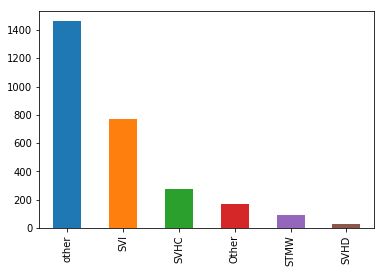

In [29]:
train['referral source'].value_counts().plot.bar();

In [30]:
train['referral source'].value_counts()

other    1463
SVI       770
SVHC      275
Other     169
STMW       91
SVHD       31
Name: referral source, dtype: int64

# query - hypop (OK)

# TSH, TSH measured (OK)
Obsahuje nevyplnené hodnoty, ktoré vyplníme mediánom. Outliery majú vysoké hodnoty ktoré je treba vyvážiť s ostatnými hodnotami. Kedže obsahuje hodnoty menšie ako 1, namiesto použitia logaritmu použijeme odmocninu.

### Stará distribúcia

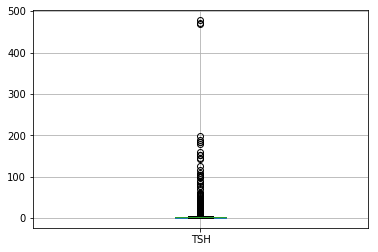

In [31]:
train.boxplot(column='TSH')         # filtrovany boxplot

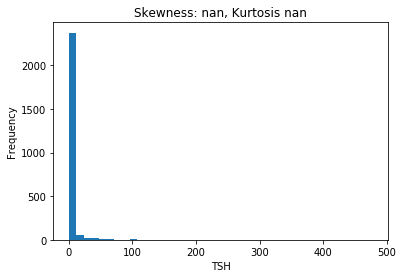

In [32]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['TSH']), (stats.kurtosis(train['TSH']))))
plt.xlabel('TSH')
train.TSH.plot(kind='hist', bins = 40)

### Transformácia distribúcie

In [33]:
print(train['TSH'].head())
train['TSH'].fillna(value=train['TSH'].median(), inplace=True)
train['TSH'] = train['TSH'].apply(lambda x: math.sqrt(x))
print(train['TSH'].head())

0    13.00
1      NaN
2     2.00
3     2.70
4     0.92
Name: TSH, dtype: float64
0    3.605551
1    1.183216
2    1.414214
3    1.643168
4    0.959166
Name: TSH, dtype: float64


### Nová distribúcia

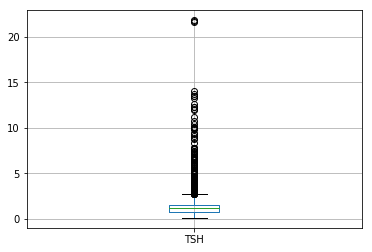

In [34]:
train.boxplot(column='TSH')

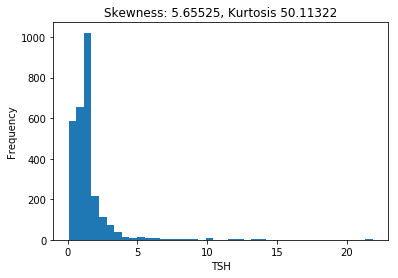

In [35]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['TSH']), (stats.kurtosis(train['TSH']))))
plt.xlabel('TSH')
train.TSH.plot(kind='hist', bins = 40)

# FTI
Pretypujeme typ object na float. Chýbajúce otáznikové hodnoty nahradíme mediánom.

In [36]:
train.loc[train['FTI'] == '?', 'FTI'] = -1
train['FTI'] = train['FTI'].astype(float) 
print('Pocet outlierov:', train[(train['FTI'] == -1)].count().iloc[0])
pom = train[(train['FTI'] > -1)]
print('Median:', pom['FTI'].median())
train.loc[train['FTI'] == -1, 'FTI'] = pom['FTI'].median()

Pocet outlierov: 295
Median: 107.0


### Distribúcia

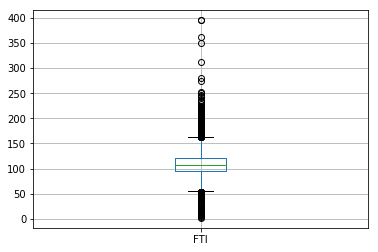

In [37]:
train.boxplot(column='FTI')

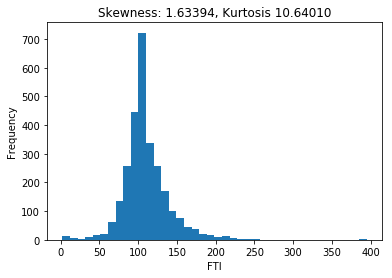

In [38]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['FTI']), (stats.kurtosis(train['FTI']))))
plt.xlabel('FTI')
train.FTI.plot(kind='hist', bins = 40)

# TBG

Pozostáva len z otáznikov, tento atribút môžeme zahodiť.

In [39]:
train.drop(columns=['TBG'], inplace=True)
train.drop(columns=['TBG measured'], inplace=True)

# fnlwgt
V nasledujúcich dvoch obrázkoch je vidiet veľká vychýlenosť hodnôt

### Stará distribúcia

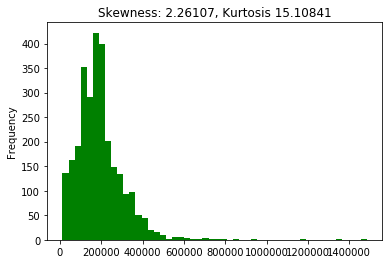

In [40]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['fnlwgt']), (stats.kurtosis(train['fnlwgt']))))
train.fnlwgt.plot(kind='hist', bins = 50, color="Green")

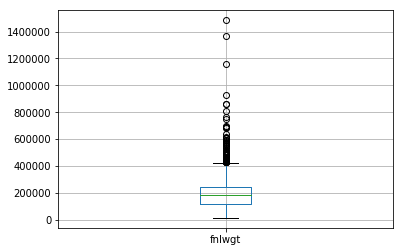

In [41]:
train.head()
train.boxplot(column='fnlwgt')

Outliery sú vo vysokách hodnotách. Na to, aby boli viac vyváženejšie s ostatnými, aplikujeme funkciu logaritmus.

### Nová distribúcia

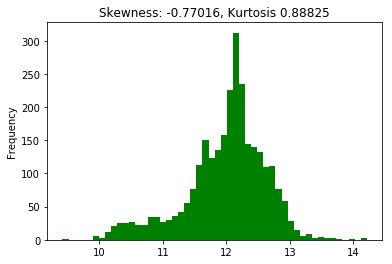

In [42]:
train['fnlwgt'] = train['fnlwgt'].apply(lambda x: math.log(x))    # aplikovanie funkcie logaritmus
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['fnlwgt']), (stats.kurtosis(train['fnlwgt']))))
train.fnlwgt.plot(kind='hist', bins = 50, color="Green")

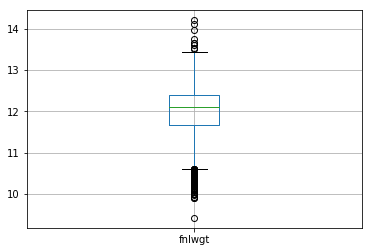

In [43]:
train.boxplot(column='fnlwgt')

# Psych

In [44]:
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Wife'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Husband'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Own-child'  ), 'psych'] = 'f'

In [45]:
train['psych'].value_counts()

f     2440
t      125
??      52
Name: psych, dtype: int64

In [46]:
train.loc[(train['psych']=='??' )  & (train['marital-status']== ' Married-spouse-absent'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['marital-status']== ' Widowed'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['marital-status']== ' Never-married'  ), 'psych'] = 'f'

In [47]:
train['psych'].value_counts()

f     2469
t      125
??      23
Name: psych, dtype: int64

In [48]:
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Other-relative'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Unmarried'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Not-in-family'  ), 'psych'] = 'f'

In [49]:
train['psych'].value_counts()

f    2492
t     125
Name: psych, dtype: int64

This column is resolved

In [50]:
train['psych'].isnull().sum()

182

In [51]:
train.loc[(train['psych'].isnull())]

Unnamed: 0   age sex on thyroxine query on thyroxine  \
2              2  79.0   F            f                  f   
11            11  78.0   M            f                  f   
15            15  73.0   M            f                  t   
16            16  54.0   M            f                  t   
24            24  22.0   M            f                  f   
46            46  59.0   M            t                  f   
62            62  44.0   M            f                  f   
63            63  39.0   M            f                  f   
73            73  23.0   F            f                  f   
74            74  32.0   M            f                  f   
78            78  63.0   M            f                  f   
80            80  61.0   M            t                  f   
88            88  21.0   M            t                  f   
131          131  55.0   F            f                  f   
143          143  53.0   M            f                  f   
147          147  80.0   M            f                  f   
155          155  50.0   F            f                  f   
196          196  49.0   F            f                  f   
243          243  41.0   F            f                  f   
255          255  62.0   F            f                  f   
261          261  34.0   F            t                  f   
263          263  75.0   F            f                  f   
264          264  81.0   M            f                  f   
267          267  22.0   M            f                  f   
278          278  29.0   F            f                  f   
288          288  50.0   F            f                  f   
294          294  30.0   F            f                  f   
305          305  61.0   M            f                  f   
310          310  67.0   M            f                  f   
319          319  68.0   F            t                  f   
...          ...   ...  ..          ...                ...   
2185        2185  78.0   M            f                  f   
2202        2202  16.0   M            f                  f   
2222        2222  13.0   M            f                  f   
2266        2266  21.0   F            f                  f   
2269        2269  57.0   F            f                  f   
2278        2278  85.0   F            f                  f   
2297        2297  19.0   F            f                  f   
2349        2349  45.0   F            t                  f   
2369        2369  55.0   M            f                  f   
2407        2407  83.0   F            f                  f   
2411        2411  17.0   M            f                  f   
2420        2420  25.0   F            f                  f   
2430        2430  79.0   F            f                  f   
2452        2452  68.0   M            f                  f   
2466        2466  71.0   M            f                  f   
2482        2482  47.0   M            f                  f   
2506        2506  51.0   F            f                  f   
2521        2521  34.0   F            f                  f   
2529        2529  28.0   F            f                  f   
2571        2571  15.0   F            f                  f   
2577        2577  83.0   F            f                  f   
2599        2599  68.0   M            f                  f   
2647        2647  87.0   M            f                  f   
2651        2651  26.0   M            f                  f   
2653        2653  67.0   F            f                  f   
2680        2680  73.0   F            f                  f   
2713        2713  59.0   F            f                  f   
2738        2738  70.0   F            t                  f   
2773        2773  75.0   M            f                  f   
2783        2783  73.0   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
2                            f    f        f               f              f   
11 

filling the remaining data with mode of the row

In [52]:
train["psych"] = train["psych"].fillna("f")

In [53]:
train['psych'].isnull().sum()

0

# education-num
Obsahuje vychýlene hodnoty, ktoré stačí vydeliť číslom 100, v prípade záporného čísla číslom -100 a pretypovať typ float na integer.

### Nová distribúcia

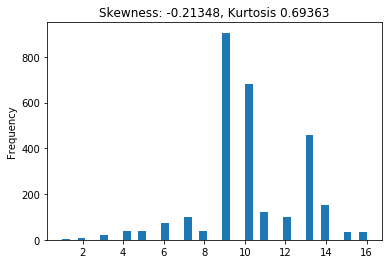

In [54]:
train.loc[train['education-num'] < 0, 'education-num'] /= -100
train.loc[train['education-num'] > 99, 'education-num'] /= 100
train['education-num'] = train['education-num'].astype(int) 

plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['education-num']), (stats.kurtosis(train['education-num']))))
train['education-num'].plot(kind='hist', bins = 40)

# capital-gain
- nevyplnene hodnoty nahradime medianom (najcastejsou hodnotou 0)
- transformácia 12 outlierov taktiez medianom z intervalu hodnôt 10000 až 99998

In [55]:
print(train['capital-gain'].isnull().sum())
train["capital-gain"] = train["capital-gain"].fillna(train["capital-gain"].median())
train['capital-gain'].isnull().sum()

280


0

In [56]:
train["capital-gain"].head(30) 
train['psych'].head(30)

0     f
1     f
2     f
3     f
4     f
5     f
6     f
7     f
8     f
9     f
10    t
11    f
12    f
13    f
14    f
15    f
16    f
17    f
18    f
19    f
20    f
21    f
22    f
23    f
24    f
25    f
26    f
27    f
28    f
29    f
Name: psych, dtype: object

In [57]:
train['capital-gain'].describe()   # vacsina hodnot 0

count     2799.00000
mean       839.85602
std       6827.92721
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      99999.00000
Name: capital-gain, dtype: float64

In [58]:
train.loc[train['education-num'] < 0, 'education-num'] /= -100
train.loc[train['education-num'] > 99, 'education-num'] /= 100
train['education-num'] = train['education-num'].astype(int) 


print('Pocet outlierov:', train[(train['capital-gain'] == 99999)].count().iloc[0])   # počet outlierov
pom = train[(train['capital-gain'] > 10000) & (train['capital-gain'] != 99999)]
print('Median:', pom['capital-gain'].median())                              # median
train.loc[train['capital-gain'] == 99999, 'capital-gain'] = pom['capital-gain'].median()

Pocet outlierov: 12
Median: 15024.0


# T3 T3 measured

# Before

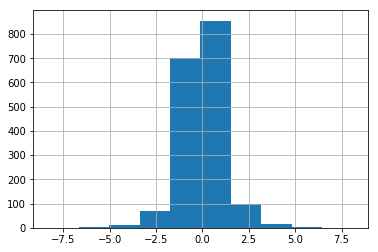

In [59]:
train["T3"].diff().hist()

In [60]:
train["T3"] = train["T3"].fillna(train["T3"].mean())
train["T3"].isnull().sum()

0

# After 

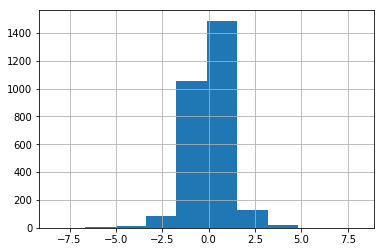

In [61]:
train["T3"].diff().hist()

TT4 and T4

In [62]:
train["TT4"].isnull().sum()

184

# Before

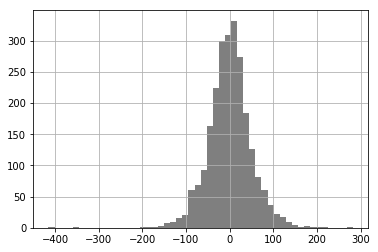

In [63]:
train["TT4"].diff().hist(color='k', alpha=0.5, bins=50)

# After

In [64]:
train["TT4"] = train["TT4"].fillna(train["TT4"].median())

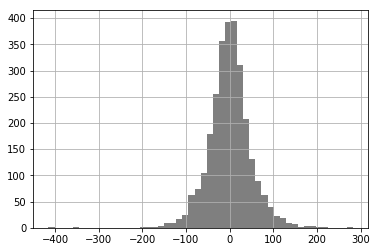

In [65]:
train["TT4"].diff().hist(color='k', alpha=0.5, bins=50)

In [66]:
train['TT4'].isnull().sum()

0

# T4U and T4U measured

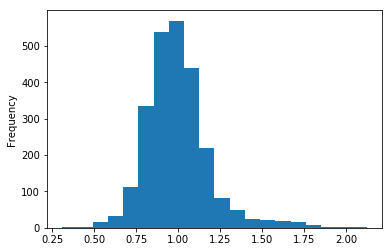

In [67]:
train["T4U"].plot.hist(stacked=True, bins=20)

In [68]:
train['T4U'].isnull().sum()

297

In [69]:
train["T4U"] = train["T4U"].fillna(train["T4U"].median())

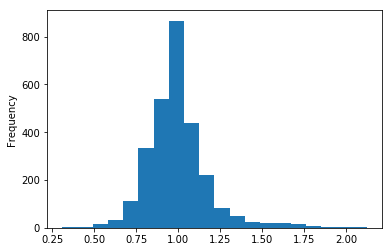

In [70]:
train["T4U"].plot.hist(stacked=True, bins=20)

Workclass

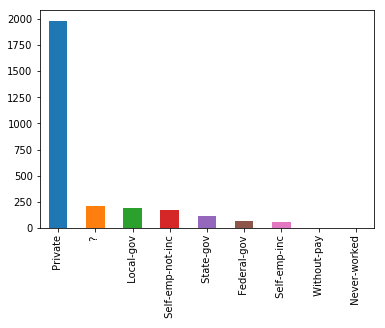

In [71]:
train['workclass'].value_counts().plot.bar();

In [72]:
train.loc[(train['workclass']==' ?' ) , 'workclass'] =  train["workclass"].mode()

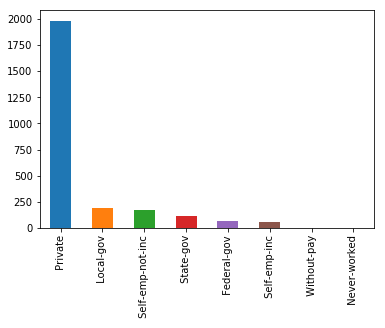

In [73]:
train['workclass'].value_counts().plot.bar();



# Occupation class

In [74]:
train.loc[(train['occupation']== ' ?'), 'occupation'] = train["occupation"].mode()
train.loc[(train['occupation']== ' Priv-house-serv'), 'occupation'] = 'Priv-house-serv'
train.loc[(train['occupation']== ' ?' ) & (train['class']== 'sick'),  'occupation'] = 'Priv-house-serv'


In [75]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

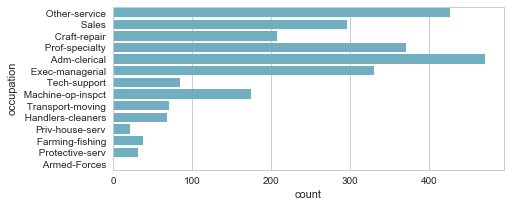

In [76]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="occupation", data=train, color="c");

Country

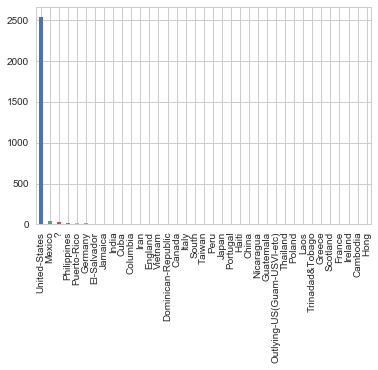

In [77]:
train['Country'].value_counts().plot.bar();

In [78]:
train.loc[(train['Country']== '?'), 'Country'] = train["Country"].mode()

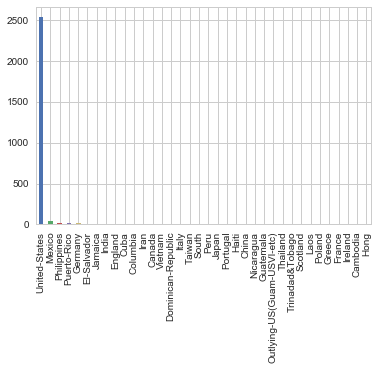

In [79]:
train['Country'].value_counts().plot.bar();

# Capital-loss (OK)

# hours per week
Neobsahuje chýbajúce hodnoty, má však vychýlené hodnoty 99 ktoré by sa mohli nahradiť najfrekventovanejšou hodnotou 40. (modusom).

In [80]:
train['hours-per-week'].describe()

count    2799.000000
mean       38.698821
std        12.703063
min         1.000000
25%        35.000000
50%        40.000000
75%        40.000000
max        99.000000
Name: hours-per-week, dtype: float64

In [81]:
train.loc[train['hours-per-week'] == 99, 'hours-per-week'] = train["hours-per-week"].mode()
train['hours-per-week'].describe()

count    2786.000000
mean       38.417444
std        12.044435
min         1.000000
25%        35.000000
50%        40.000000
75%        40.000000
max        94.000000
Name: hours-per-week, dtype: float64

In [82]:
test.sex.value_counts()
        

F    664
M    308
Name: sex, dtype: int64

Feature Standardisation
Label Encoding


In [83]:
train.to_csv('repairedTrain2.csv')